In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar',
           'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
df = pd.read_csv(url, names=columns)

In [3]:
X = df.drop('letter', axis=1).values
y = df['letter'].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y, num_classes=26)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 classes (A-Z)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8423 - loss: 0.5361 - val_accuracy: 0.8637 - val_loss: 0.4457
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8763 - loss: 0.4099 - val_accuracy: 0.8852 - val_loss: 0.3758
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8952 - loss: 0.3470 - val_accuracy: 0.9050 - val_loss: 0.3101
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9125 - loss: 0.2809 - val_accuracy: 0.9100 - val_loss: 0.2776
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9265 - loss: 0.2441 - val_accuracy: 0.9195 - val_loss: 0.2505
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9350 - loss: 0.2081 - val_accuracy: 0.9235 - val_loss: 0.2427
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9381 - loss: 0.2003 - val_accuracy: 0.9312 - val_loss: 0.2171
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9469 - loss: 0.1702 - val_accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9292 - loss: 0.2022
Test Accuracy: 0.9333


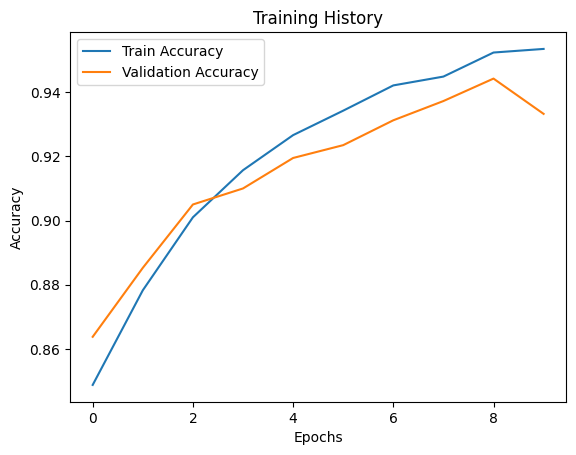

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

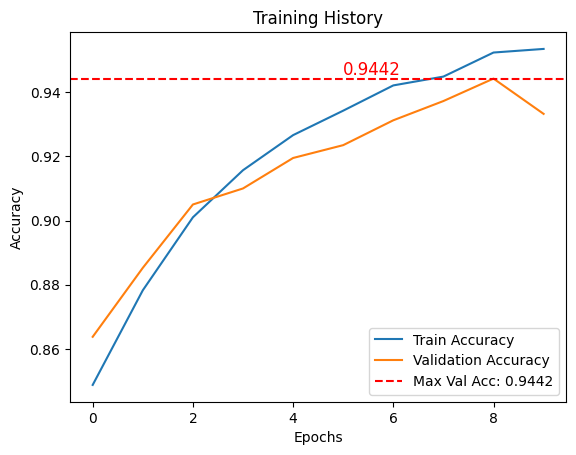

In [ ]:
# Extract accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Find the highest validation accuracy and corresponding epoch
max_val_acc = max(val_acc)
max_epoch = val_acc.index(max_val_acc)

# Plot training and validation accuracy
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

# Add a red dashed line for highest validation accuracy
plt.axhline(y=max_val_acc, color='red', linestyle='dashed', label=f'Max Val Acc: {max_val_acc:.4f}')

# Annotate the highest accuracy
plt.text(x=len(train_acc)-5, y=max_val_acc, s=f"{max_val_acc:.4f}", color='red', fontsize=12, verticalalignment='bottom')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

---

In [9]:
X_train = X_train.reshape(-1, 4, 4, 1).astype(np.float32)
X_test = X_test.reshape(-1, 4, 4, 1).astype(np.float32)

In [18]:
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [20]:
def create_model(learning_rate, optimizer):

    model = keras.Sequential([
        layers.Input(shape=(4, 4, 1)),  # Reshaped input from (16,) to (4,4,1)
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(26, activation='softmax')
    ])

    # Select optimizer
    if optimizer.lower() == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer.lower() == 'sgd':
        opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer.lower() == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Choose from 'adam', 'sgd', or 'rmsprop'.")

    # Compile the model
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [21]:
optimizers = ['sgd', 'adam', 'rmsprop']
learning_rates = [0.01, 0.001, 0.0001]

history_dict = {}
models_dict = {}

for optimizer in optimizers:
    for learning_rate in learning_rates:
        print(f"Training with Optimizer: {optimizer}, Learning Rate: {learning_rate}")

        # Create and train model
        model = create_model(learning_rate, optimizer)
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

        # Store results
        models_dict[(optimizer, learning_rate)] = model
        history_dict[(optimizer, learning_rate)] = history.history

        # Print final results
        print(f"Final Training Loss: {history.history['loss'][-1]:.4f}, Accuracy: {history.history['accuracy'][-1]:.4f}")
        print("------------------------------------------------------")


Training with Optimizer: sgd, Learning Rate: 0.01
Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1819 - loss: 2.8677 - val_accuracy: 0.6463 - val_loss: 1.2879
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6337 - loss: 1.2203 - val_accuracy: 0.7641 - val_loss: 0.7986
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.7934 - val_accuracy: 0.8153 - val_loss: 0.6208
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8055 - loss: 0.6191 - val_accuracy: 0.8416 - val_loss: 0.4998
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8274 - loss: 0.5382 - val_accuracy: 0.8725 - val_loss: 0.4092
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.4559 - val_accuracy: 0.8813 - val_loss: 0.4026
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8784 - loss: 0.3761 - val_accuracy: 0.8903 - val_loss: 0.3488
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - 

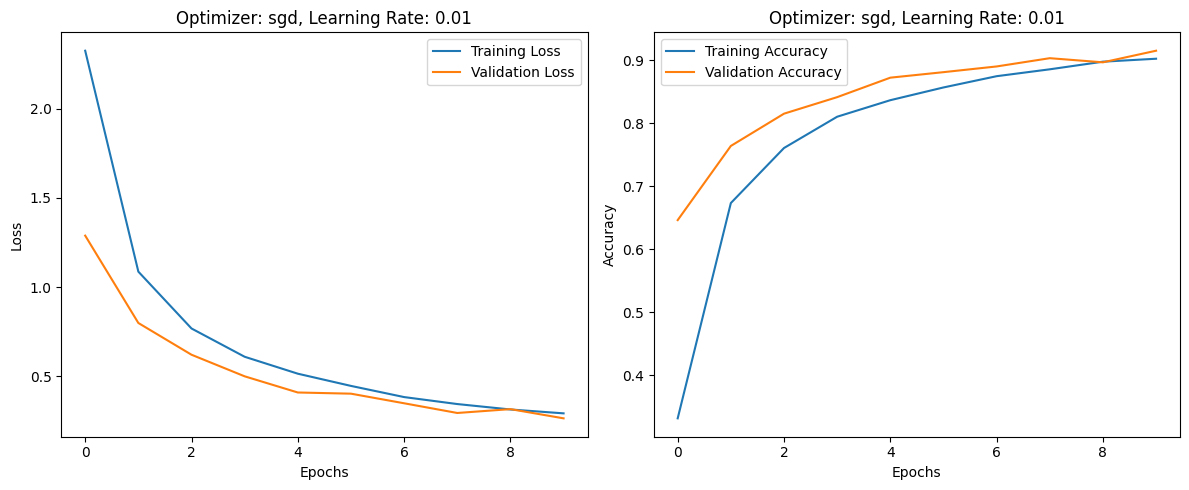

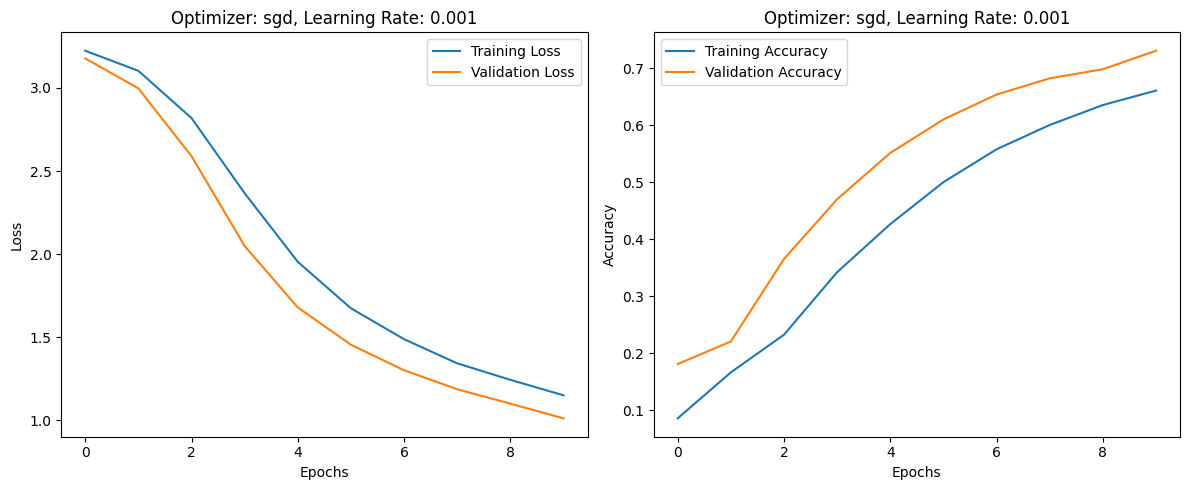

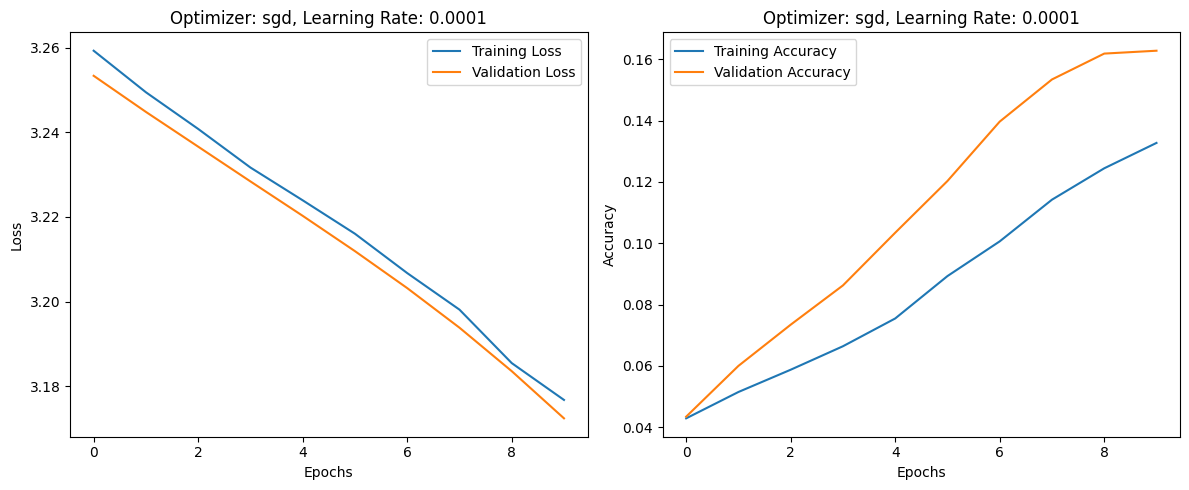

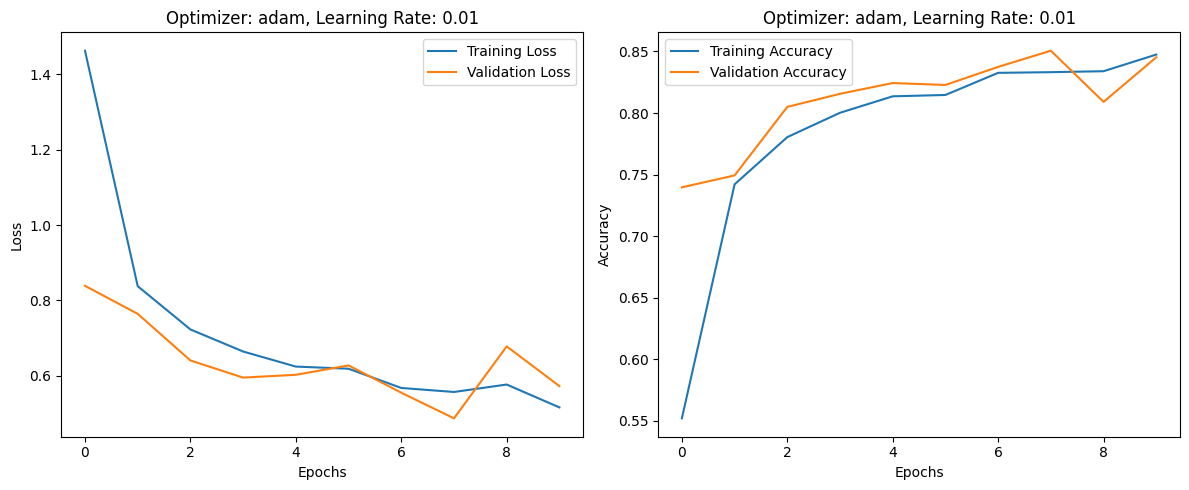

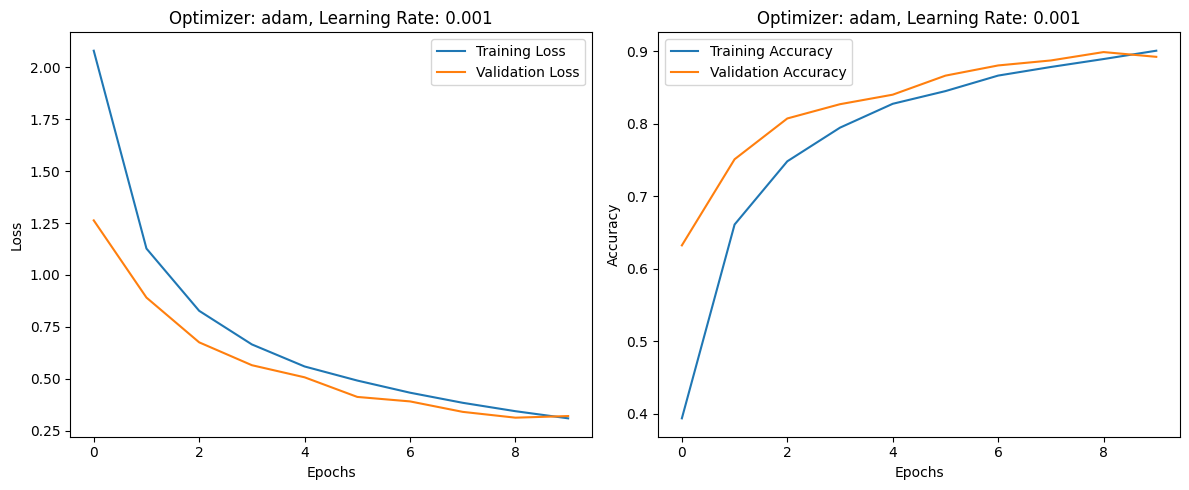

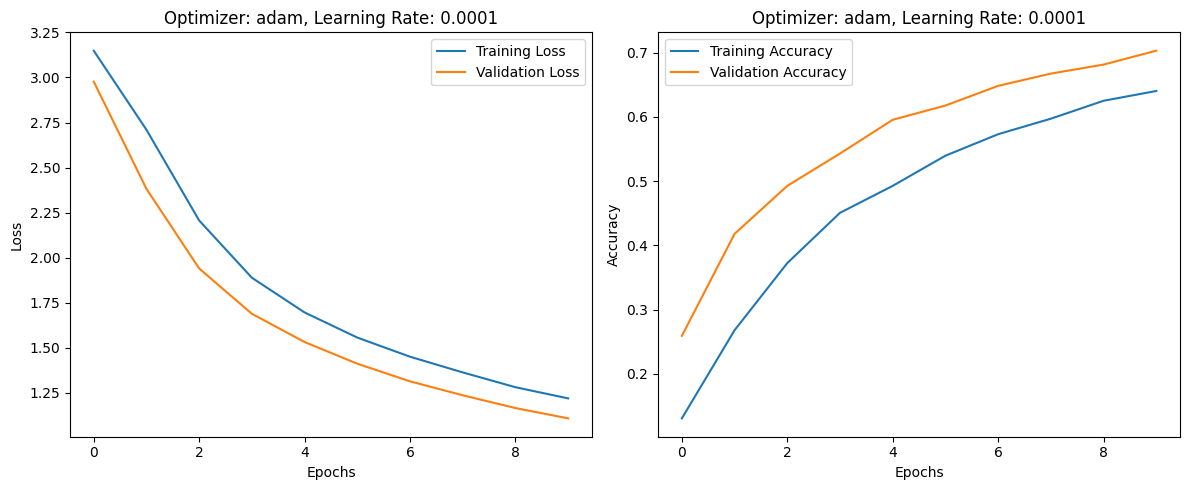

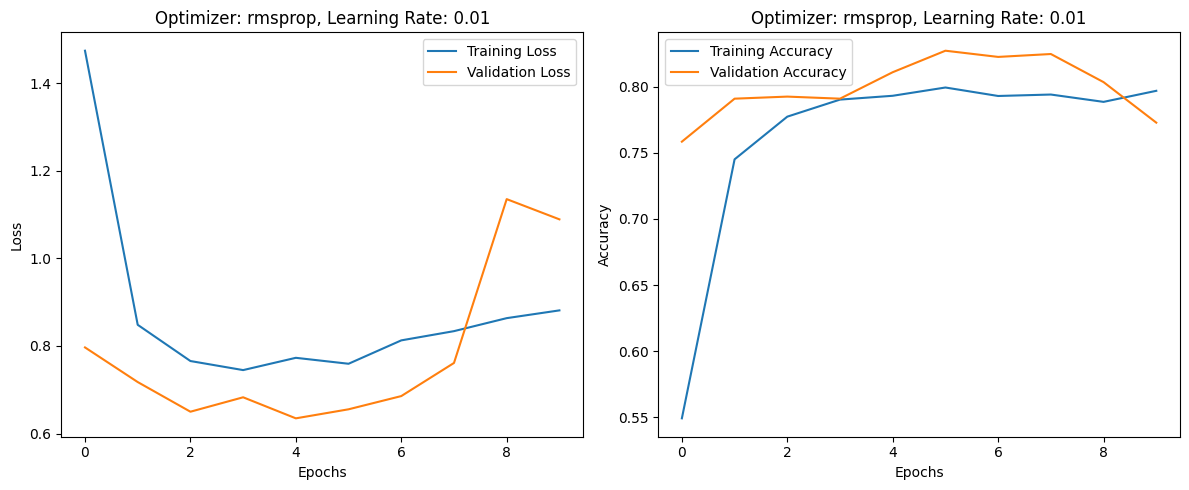

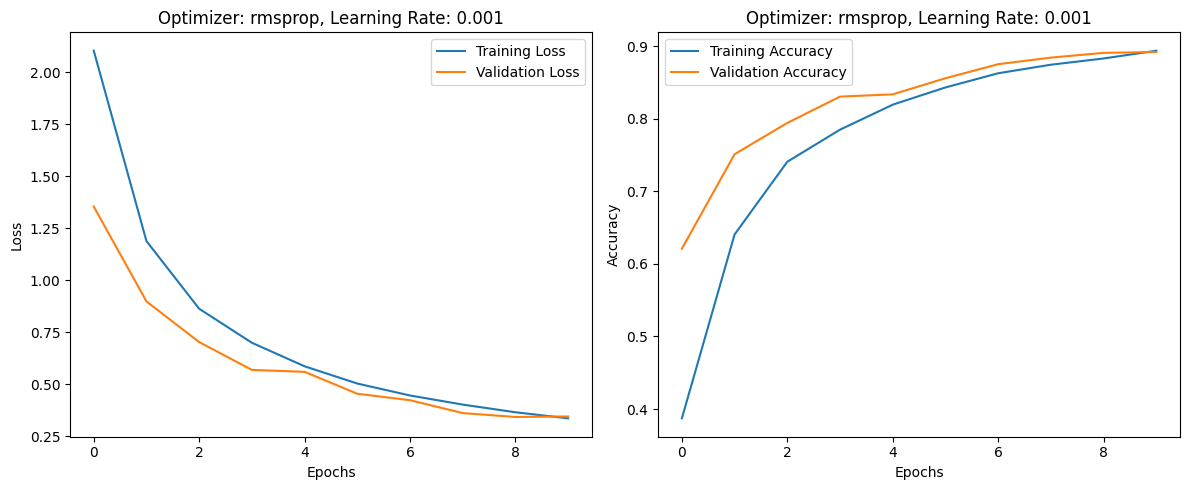

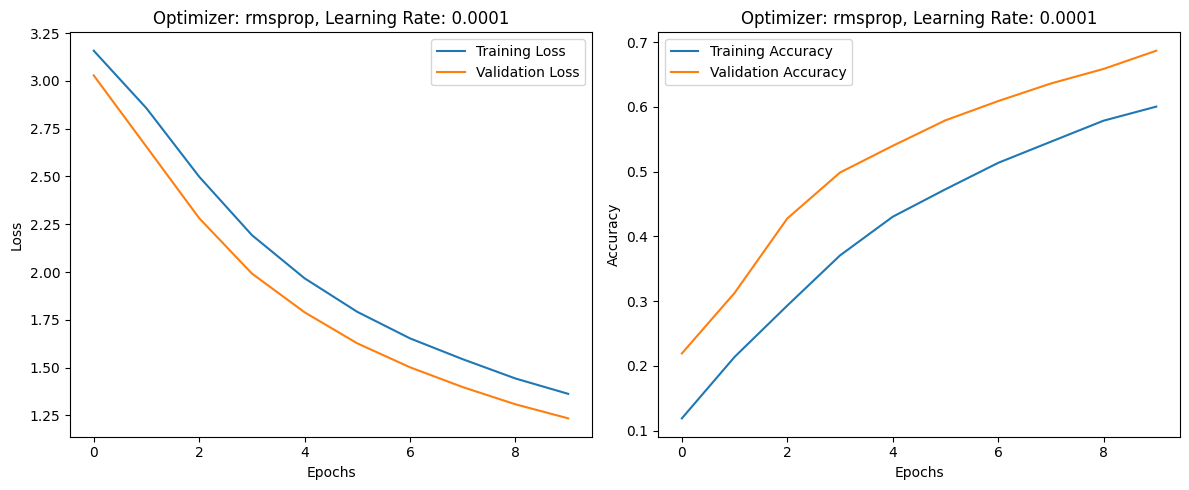

In [22]:
# for loop to plot loss plot beside accurray plot
for optimizer, learning_rate in history_dict.keys() :
    history = history_dict[(optimizer, learning_rate)]
    loss = history['loss']
    val_loss = history['val_loss']
    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']

    plt.figure(figsize=(12, 5))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f'Optimizer: {optimizer}, Learning Rate: {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title(f'Optimizer: {optimizer}, Learning Rate: {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [23]:
# best accururay among all
best_accuracy =0
best_optimizer = None
best_learning_rate = None

for optimizer, learning_rate in history_dict.keys() :
    history = history_dict[(optimizer, learning_rate)]
    accuracy = history['val_accuracy'][-1]
    if accuracy > best_accuracy :
        best_accuracy = accuracy
        best_optimizer = optimizer
        best_learning_rate = learning_rate

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Optimizer: {best_optimizer}")
print(f"Best Learning Rate: {best_learning_rate}")

Best Accuracy: 0.9153125286102295
Best Optimizer: sgd
Best Learning Rate: 0.01


In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


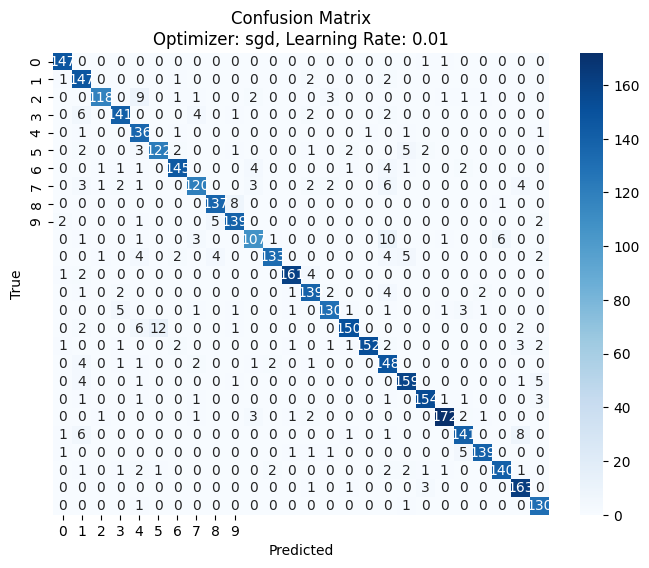

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


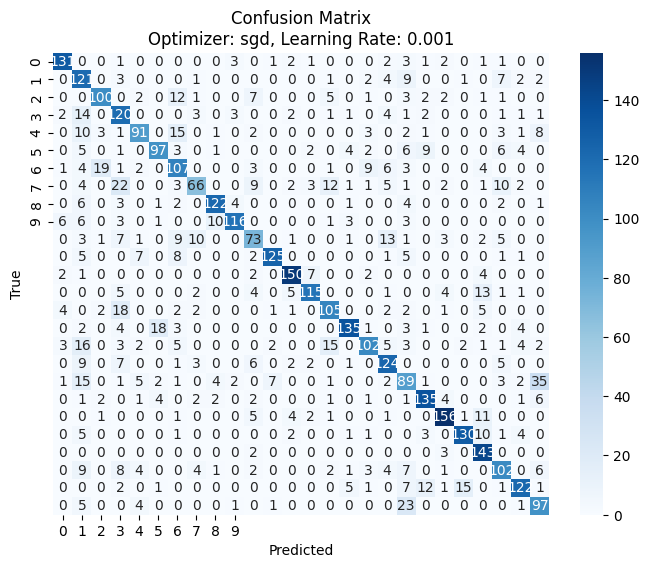

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


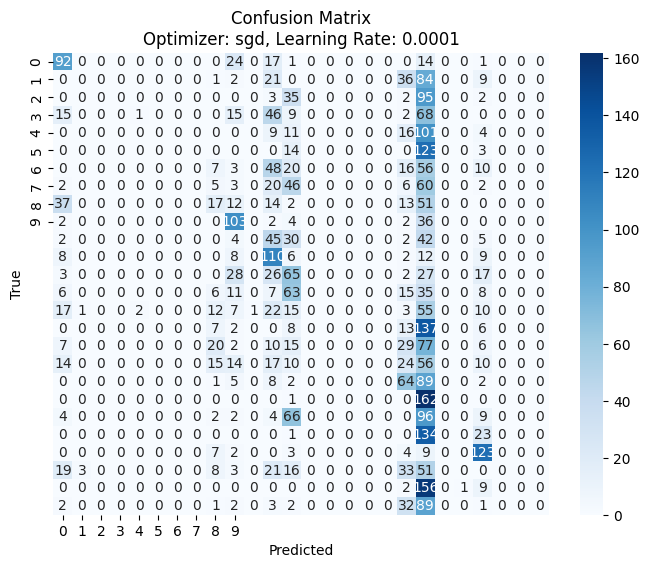

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


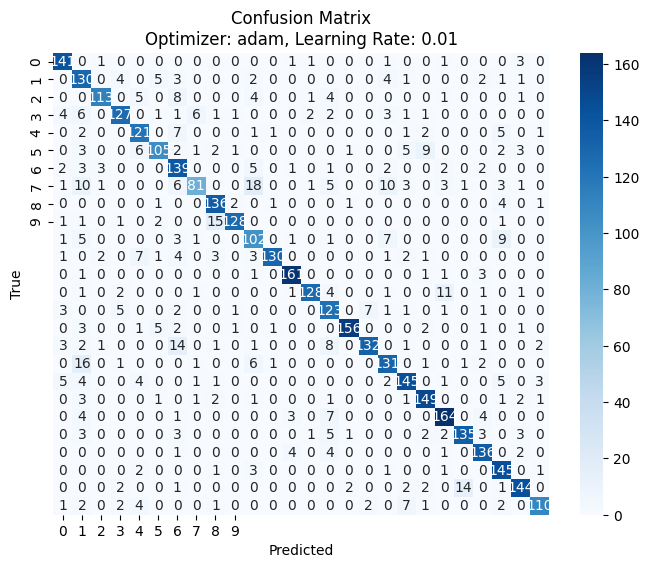

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


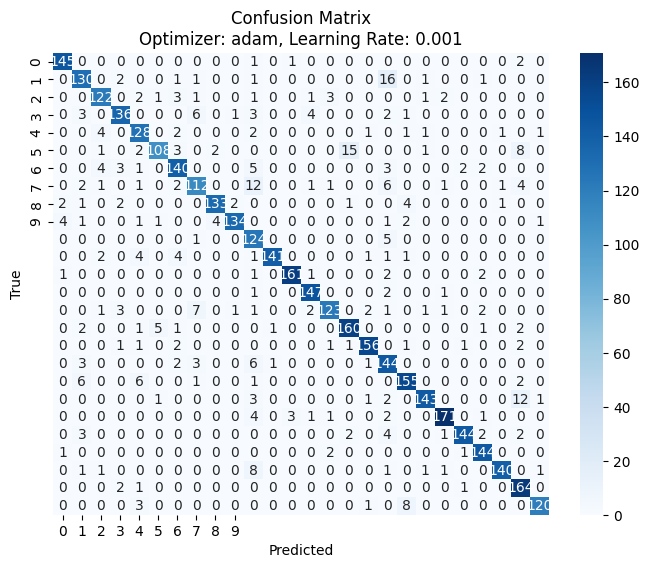

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


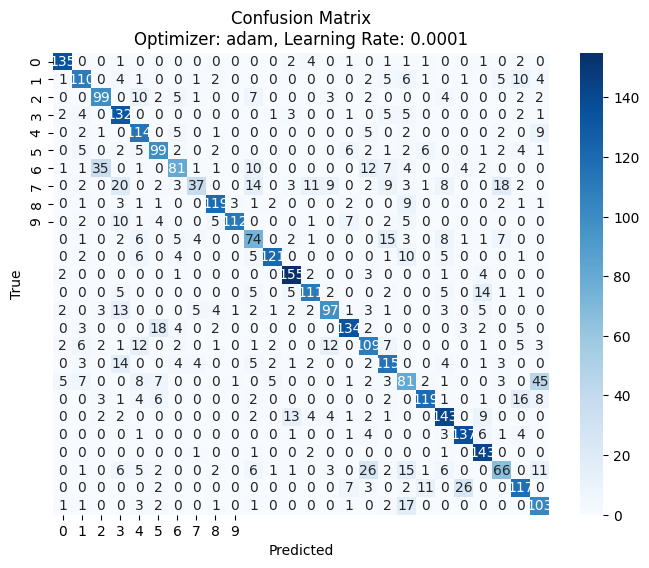

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


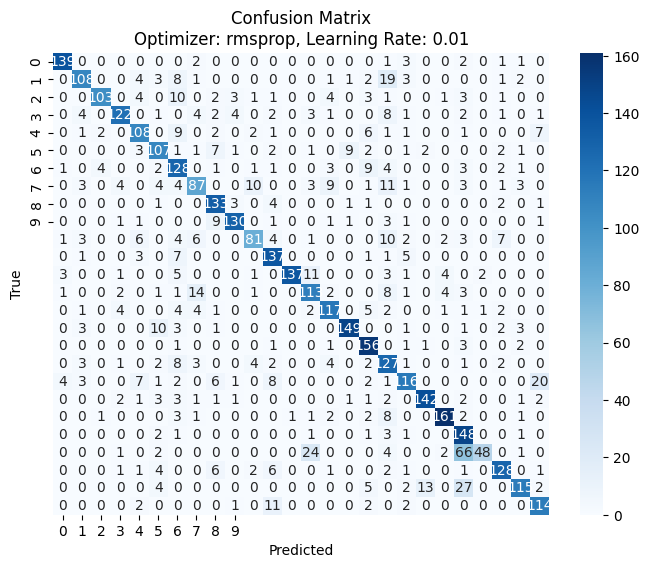

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


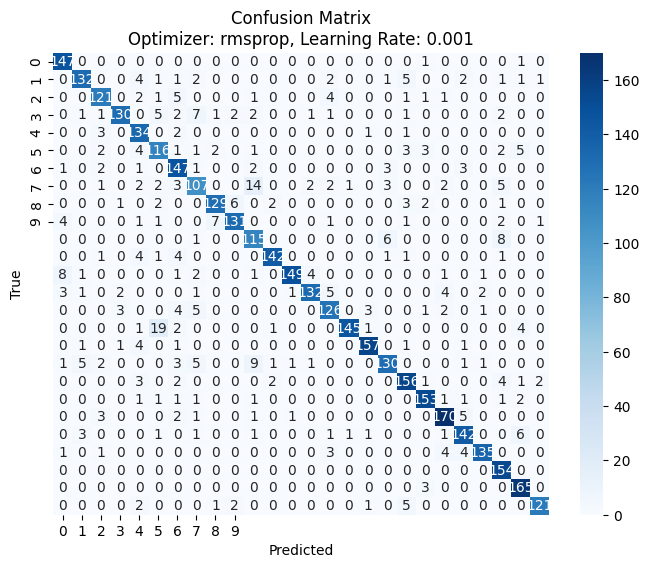

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


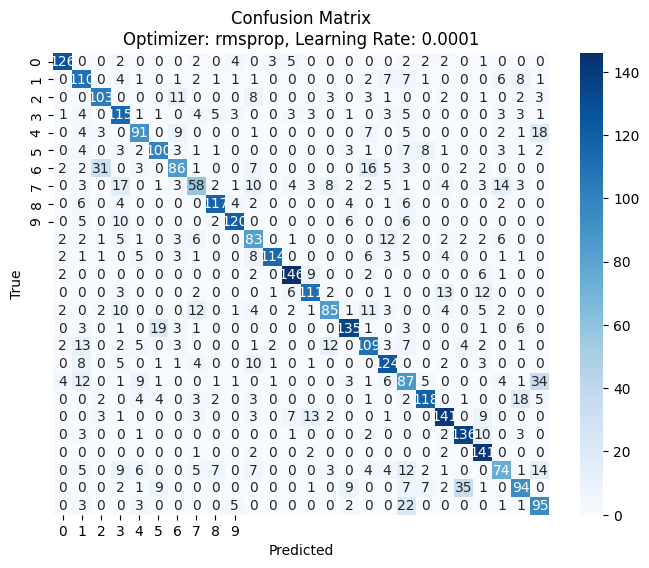

In [26]:
classification_reports = {}

# Loop through all trained models
for (optimizer, learning_rate), history in history_dict.items():

    model = models_dict[(optimizer, learning_rate)]
    # Generate confusion matrix
    y_pred = model.predict(X_test)
    y_pred_classes = tf.argmax(y_pred, axis=1)
    y_true_classes = tf.argmax(y_test, axis=1)
    cm = tf.math.confusion_matrix(y_true_classes, y_pred_classes).numpy()
    # cm = create_confusion_matrix(model[optimizer][learning_rate], x_test, y_test)

    # Calculate classification report
    # y_pred = model.predict(x_test)
    # y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
    # y_true_classes = tf.argmax(y_test, axis=1).numpy()
    report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    classification_reports[(optimizer, learning_rate)] = report

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(f"Confusion Matrix\nOptimizer: {optimizer}, Learning Rate: {learning_rate}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [27]:
# Create a summary table of classification reports
report_df = pd.DataFrame()

for (optimizer, learning_rate), report in classification_reports.items():
    summary = {
        "Optimizer": optimizer,
        "Learning Rate": learning_rate,
        "Accuracy": report["accuracy"],
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }
    report_df = pd.concat([report_df, pd.DataFrame([summary])], ignore_index=True)

# Display the summary table
print(report_df)

  Optimizer  Learning Rate  Accuracy  Precision   Recall  F1-score
0       sgd         0.0100   0.91750   0.920871  0.91750  0.917790
1       sgd         0.0010   0.74350   0.756451  0.74350  0.744807
2       sgd         0.0001   0.18400   0.080331  0.18400  0.104387
3      adam         0.0100   0.85300   0.861527  0.85300  0.853462
4      adam         0.0010   0.90625   0.911748  0.90625  0.907043
5      adam         0.0001   0.71575   0.722068  0.71575  0.710650
6   rmsprop         0.0100   0.78850   0.809088  0.78850  0.787064
7   rmsprop         0.0010   0.89650   0.900192  0.89650  0.896651
8   rmsprop         0.0001   0.70475   0.711195  0.70475  0.703648


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


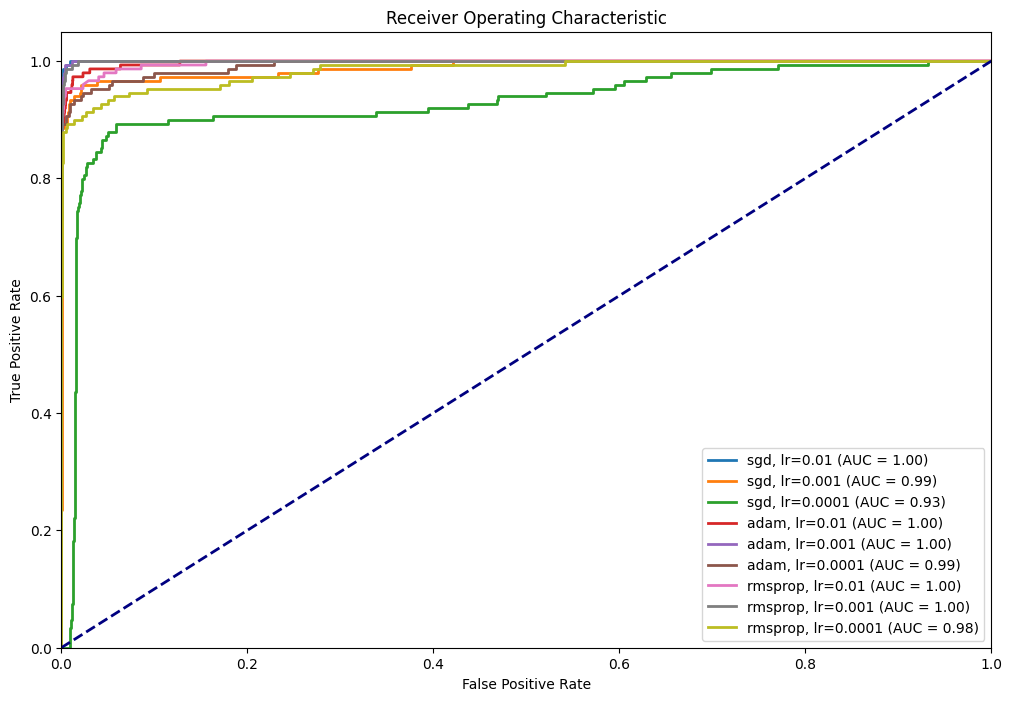

In [29]:
# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through models
for (optimizer, learning_rate), model in models_dict.items():
  y_pred_prob = model.predict(X_test)
  class_index = 0
  fpr, tpr, thresholds = roc_curve(y_test[:, class_index], y_pred_prob[:, class_index])
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, lw =2, label =f'{optimizer}, lr={learning_rate} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color= "navy", lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()